In [2]:
from pandas import read_csv
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Solving_forest = make_pipeline(
#     StandardScaler(),
#     LogisticRegression(C=2, max_iter=400),
# )
Solving_forest = BaggingClassifier()
data = read_csv('train.csv')
print(data.shape)
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.75)
print(X_test.shape, y_test.shape)
Solving_forest.fit(X_train, y_train)
roc_auc_score(y_test, Solving_forest.predict_proba(X_test), multi_class='ovo', )
%store Solving_forest

(42000, 785)
(10500, 784) (10500,)
Stored 'Solving_forest' (BaggingClassifier)


In [1]:
%store -r  Solving_forest

[0]


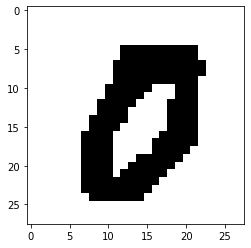

In [15]:
from random import randint
import matplotlib.pyplot as plt
from numpy import reshape
from pandas import read_csv
given_num = randint(0, data.__len__() - 1)
X_ist = data.iloc[given_num:(given_num + 1) % len(data), 1:].copy()
X = X_ist.iloc[0].to_numpy().copy()
X = X != 0
X = X.astype('int')
X = list(map(lambda x: (255*(1-x),)*3, X))
X = reshape(X, (28,28,3))
imgplot = plt.imshow(X)
# X = reshape(X, (28,28))
# for i in X:
#     print(''.join(i.astype('int').astype('str')))
print(Solving_forest.predict(X_ist))


In [25]:
from re import S
from sklearn.ensemble import GradientBoostingClassifier
from pandas import read_csv
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.datasets import load_iris

data = load_iris()

X = data['data']
Y = data['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
cls = GradientBoostingClassifier()
cls.fit(X_train, Y_train)
roc_auc_score(Y_test, cls.predict_proba(X_test), multi_class='ovr')
cross_val_score(cls, X, Y, scoring='accuracy')


array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

[5.11611186 7.50584383]


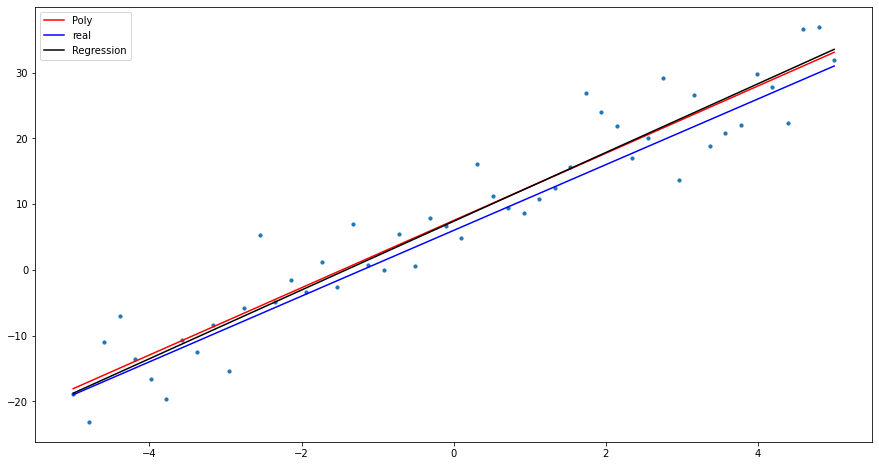

-9.320033026093064

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split


def linear_expression(x):
    return 5 * x + 6

# по признакам сгенерируем значения таргетов с некоторым шумом
objects_num = 50
X = np.linspace(-5, 5, objects_num)
y = linear_expression(X) + np.random.randn(objects_num) * 10

#object_num = 1000
# X = np.linspace(-2,2,object_num)
# np.random.seed(50)
# y = 50 * X ** 3 + 3 * X ** 2 + 2 * X + 3 + np.random.randn(object_num)
x = np.vander(X, 2)
first = np.linalg.inv(np.dot(x.T, x))
second = np.dot(x.T, y)
res = np.dot(first, second)
regressor = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
regressor.fit(X_train.reshape(-1, 1), y_train)
print(res)
plt.figure(figsize=(15,8))
plt.scatter(X, y, s=10)
plt.plot(X, x @ res, c='red', label='Poly')
plt.plot(X, linear_expression(X), c='blue', label='real')
plt.plot(X, regressor.predict(X.reshape(-1, 1)), c='Black', label='Regression')
plt.legend()
plt.show()
mean_squared_error(y, x @ res) - mean_squared_error(y_test, regressor.predict(X_test.reshape(-1, 1)))